<a href="https://www.kaggle.com/code/manish5323/eda-data-analysis?scriptVersionId=228209888" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/chocolate-sales/Chocolate Sales.xlsx
/kaggle/input/chocolate-sales/Chocolate Sales.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
data_df = pd.read_csv('../input/chocolate-sales/Chocolate Sales.csv')
data_copy = data_df.copy()

In [4]:
data_df.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04-Jan-22,"$5,320",180
1,Van Tuxwell,India,85% Dark Bars,01-Aug-22,"$7,896",94
2,Gigi Bohling,India,Peanut Butter Cubes,07-Jul-22,"$4,501",91
3,Jan Morforth,Australia,Peanut Butter Cubes,27-Apr-22,"$12,726",342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24-Feb-22,"$13,685",184


In [5]:
data_df.columns

Index(['Sales Person', 'Country', 'Product', 'Date', 'Amount',
       'Boxes Shipped'],
      dtype='object')

In [6]:
data_df.shape

(1094, 6)

In [7]:
data_df.isnull().sum()

Sales Person     0
Country          0
Product          0
Date             0
Amount           0
Boxes Shipped    0
dtype: int64

<Axes: xlabel='Country', ylabel='count'>

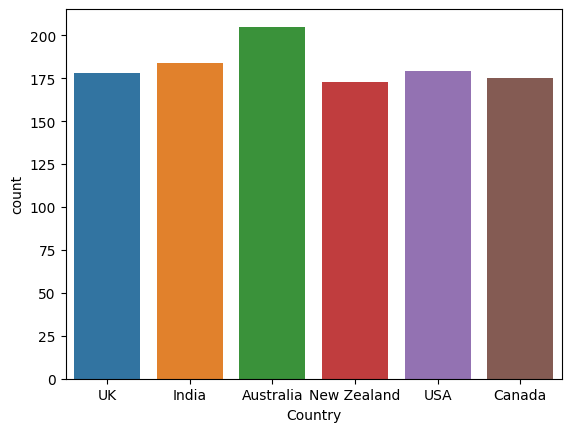

In [8]:
sb.countplot(data_df, x="Country")

In [9]:
data_df.groupby(['Country', 'Product'])['Product'].count()

Country    Product            
Australia  50% Dark Bites         16
           70% Dark Bites          9
           85% Dark Bars           8
           99% Dark & Pure        11
           After Nines             7
                                  ..
USA        Peanut Butter Cubes     7
           Raspberry Choco        11
           Smooth Sliky Salty      8
           Spicy Special Slims     8
           White Choc             10
Name: Product, Length: 132, dtype: int64

In [10]:
data_df.groupby('Country')['Boxes Shipped'].mean()

Country
Australia      159.253659
Canada         178.405714
India          160.163043
New Zealand    153.641618
UK             170.028090
USA            149.854749
Name: Boxes Shipped, dtype: float64

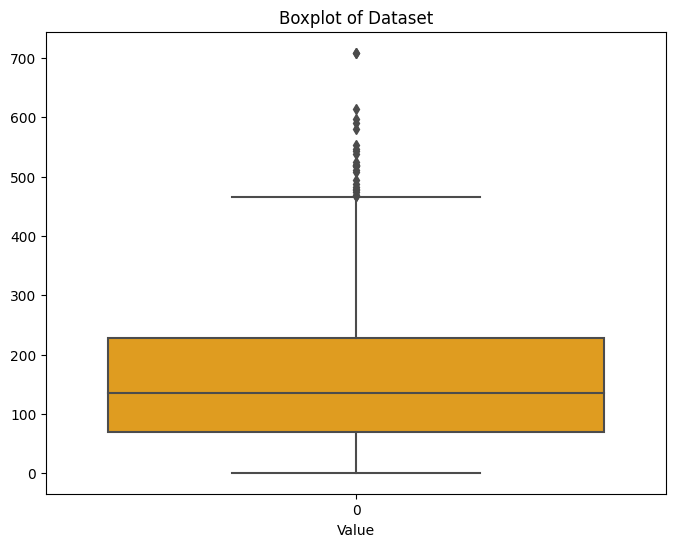

In [11]:
plt.figure(figsize=(8, 6))
sb.boxplot(data=data_df['Boxes Shipped'], color='orange')
plt.title('Boxplot of Dataset')
plt.xlabel('Value')
plt.show()

In [12]:
# Get unique categories and their counts
for column in data_df.select_dtypes(include='object').columns:
    print(f"Column: {column}")
    print(data_df[column].value_counts())
    print("-" * 30)

Column: Sales Person
Sales Person
Kelci Walkden          54
Brien Boise            53
Van Tuxwell            51
Beverie Moffet         50
Dennison Crosswaite    49
Oby Sorrel             49
Ches Bonnell           48
Karlen McCaffrey       47
Gigi Bohling           47
Curtice Advani         46
Kaine Padly            45
Madelene Upcott        45
Marney O'Breen         45
Barr Faughny           43
Jehu Rudeforth         43
Roddy Speechley        43
Gunar Cockshoot        43
Mallorie Waber         41
Jan Morforth           39
Andria Kimpton         39
Husein Augar           38
Dotty Strutley         36
Wilone O'Kielt         34
Rafaelita Blaksland    34
Camilla Castle         32
Name: count, dtype: int64
------------------------------
Column: Country
Country
Australia      205
India          184
USA            179
UK             178
Canada         175
New Zealand    173
Name: count, dtype: int64
------------------------------
Column: Product
Product
50% Dark Bites          60
Eclairs      

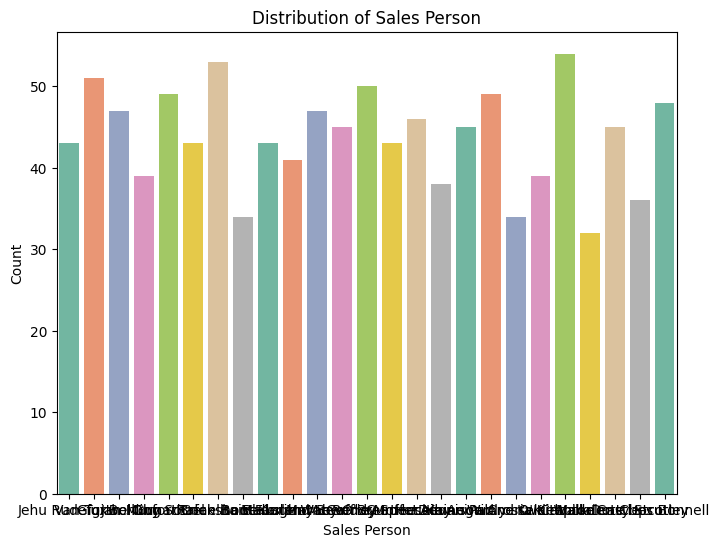

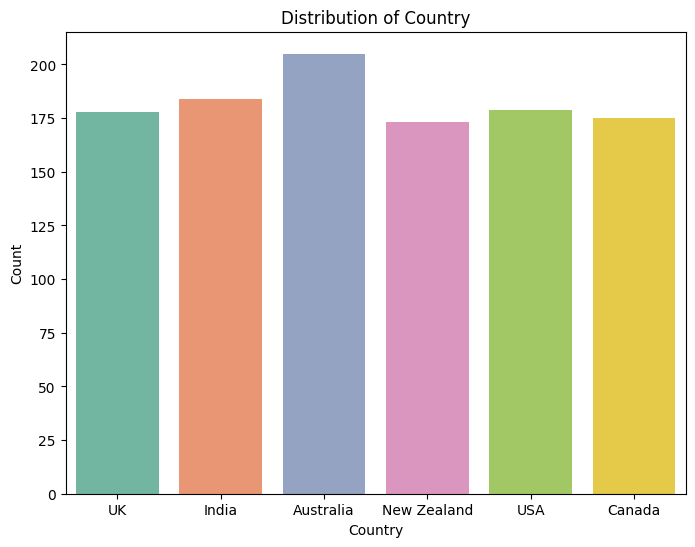

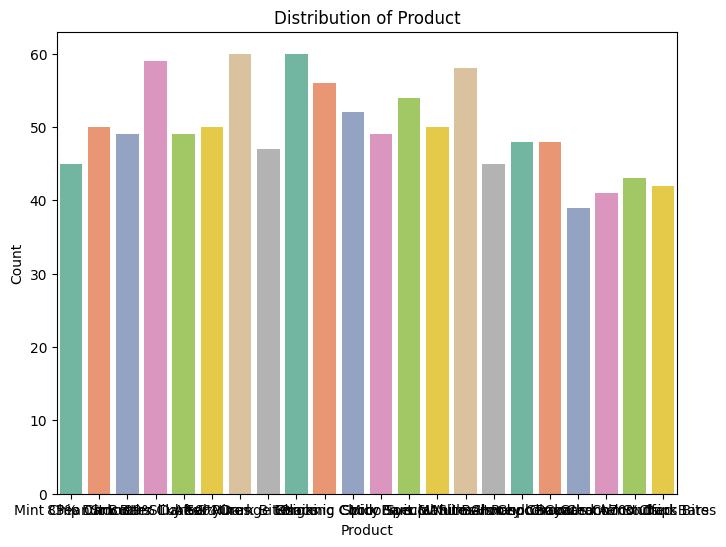

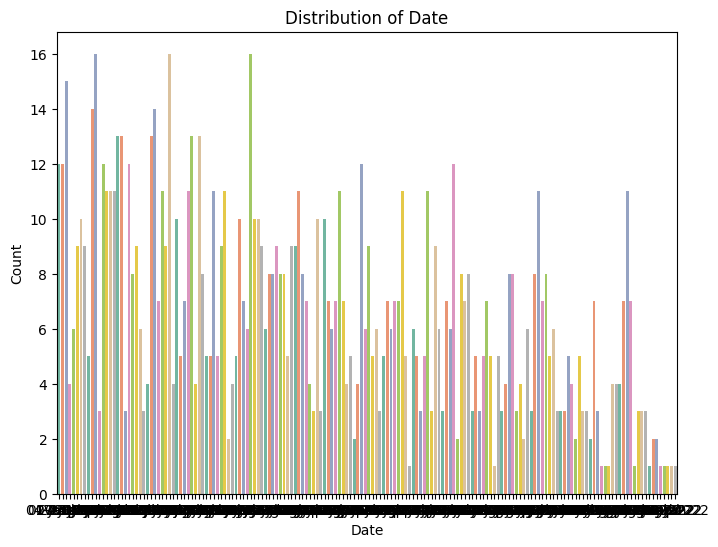

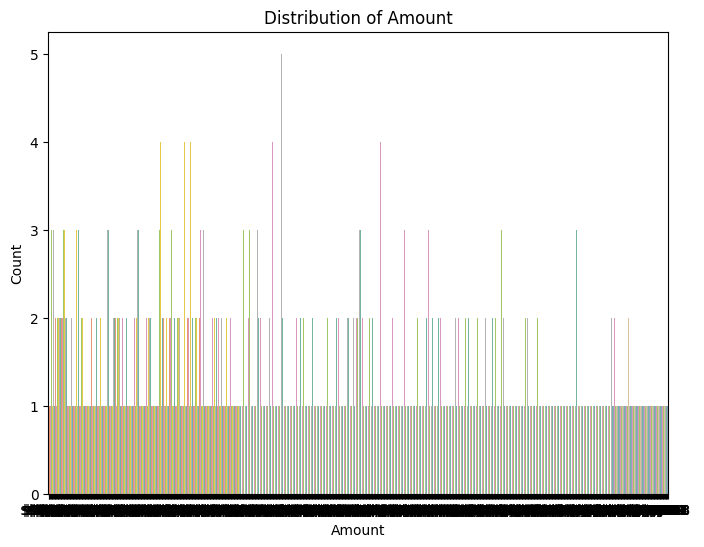

In [13]:
# Count plot for each categorical column
for column in data_df.select_dtypes(include='object').columns:
    plt.figure(figsize=(8, 6))
    sb.countplot(data=data_df, x=column, palette='Set2')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

In [14]:
# Check for missing values in categorical columns
missing_values = data_df.select_dtypes(include='object').isnull().sum()
print(missing_values)
# Handle missing values (example: fill with 'Unknown')
#df.fillna(value={'Gender': 'Unknown', 'City': 'Unknown'}, inplace=True)

Sales Person    0
Country         0
Product         0
Date            0
Amount          0
dtype: int64


In [15]:
# Mode of each categorical column
modes = data_df.mode().iloc[0]
print("Modes of Categorical Columns:")
print(modes)

Modes of Categorical Columns:
Sales Person      Kelci Walkden
Country               Australia
Product          50% Dark Bites
Date                  02-Mar-22
Amount                  $2,317 
Boxes Shipped              24.0
Name: 0, dtype: object


In [16]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding to each categorical column
for column in data_df.select_dtypes(include='object').columns:
    data_df[column] = label_encoder.fit_transform(data_df[column])

print("Label Encoded DataFrame:")
print(data_df)

Label Encoded DataFrame:
      Sales Person  Country  Product  Date  Amount  Boxes Shipped
0               13        4       14    18     518            180
1               23        2        2     1     697             94
2                9        2       17    33     450             91
3               12        0       17   145     161            342
4               13        4       17   128     179            184
...            ...      ...      ...   ...     ...            ...
1089            15        0       20    92     446            323
1090            13        5       21    34     605            119
1091             5        1       16   143     570            217
1092             8        2       10   153     241            384
1093            15        2        1   126     500            344

[1094 rows x 6 columns]


In [17]:
# Apply One-Hot Encoding using pandas.get_dummies
df_encoded = pd.get_dummies(data_copy, drop_first=True)  # drop_first avoids multicollinearity

print("One-Hot Encoded DataFrame:")
print(df_encoded)

One-Hot Encoded DataFrame:
      Boxes Shipped  Sales Person_Barr Faughny  Sales Person_Beverie Moffet  \
0               180                      False                        False   
1                94                      False                        False   
2                91                      False                        False   
3               342                      False                        False   
4               184                      False                        False   
...             ...                        ...                          ...   
1089            323                      False                        False   
1090            119                      False                        False   
1091            217                      False                        False   
1092            384                      False                        False   
1093            344                      False                        False   

      Sales Person_Brien